- ### Documents used : 
    - https://www.datacamp.com/tutorial/random-forests-classifier-python
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [6]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [7]:
#Get data 
# Read in the data
dataset = "partial_database.csv"
df = pd.read_csv(dataset)


"""
# Decomment this part if you dont have the labels in the csv file
# Read class labels
f = open("labelsDefault.txt", "r")
labels=f.read().splitlines()
labels.pop(0)

# Add y column, which is the target variable
df['y'] = list(map(int,labels))
"""

# Get X and y
Y=df['y']
X=df.drop(['y'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
numbers_of_classes=np.unique(Y) 

Index([' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r'],
      dtype='object')


In [8]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
#Model used is Random Forest
rf = RandomForestClassifier()

#Hyperparameter tuning
param_dist = {'n_estimators': randint(900,1100),
              'max_depth': randint(30,40)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Get the best parameters
print(rand_search.best_params_)
best_rf = rand_search.best_estimator_

{'max_depth': 36, 'n_estimators': 1004}


Accuracy: 0.700592885375494
Precision: 0.7065122544554818
Recall: 0.700592885375494


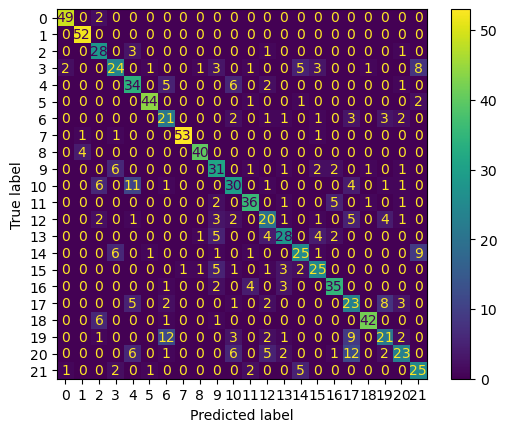

In [24]:
#Predictions
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Get the accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)